Memuat dan memproses data Fashion-MNIST...
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape data training: (60000, 32, 32, 1)
Shape data testing: (10000, 32, 32, 1)

Melatih VAE selama 20 epoch...
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 186s 388ms/step - kl_loss: 4.0082 - loss: 401.7151 - recon_loss: 397.7069
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 182s 388ms/step - kl_loss: 6.1107 - loss: 273.8712 - recon_loss: 267.7605
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 181s 385ms/step - kl_loss: 6.0496 - loss: 269.2847 - recon_loss: 263.2351
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 203s 389ms/step - kl_loss: 6.0766 - loss: 266.8533 - recon_loss: 260.7767
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 181s 386ms/step - kl_loss: 6.1251 - loss: 265.2764 - recon_loss: 259.1512
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 203s 388ms/step - kl_loss: 6.1726 - loss: 264.48

/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['z_log_var/kernel', 'z_log_var/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


469/469 ━━━━━━━━━━━━━━━━━━━━ 188s 394ms/step - loss: 0.0672
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 197s 383ms/step - loss: 0.0255
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 204s 386ms/step - loss: 0.0241
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 201s 384ms/step - loss: 0.0233
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 181s 385ms/step - loss: 0.0228
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 202s 385ms/step - loss: 0.0223
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 179s 382ms/step - loss: 0.0219
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 204s 387ms/step - loss: 0.0217
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 179s 383ms/step - loss: 0.0213
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 203s 386ms/step - loss: 0.0213
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 180s 383ms/step - loss: 0.0209
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 203s 386ms/step - loss: 0.0208
Epoch 13/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 180s 383ms/step - loss: 0.0206
Epoch 14/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 203s 385ms/step - loss: 0.0206
Epoch 15/20


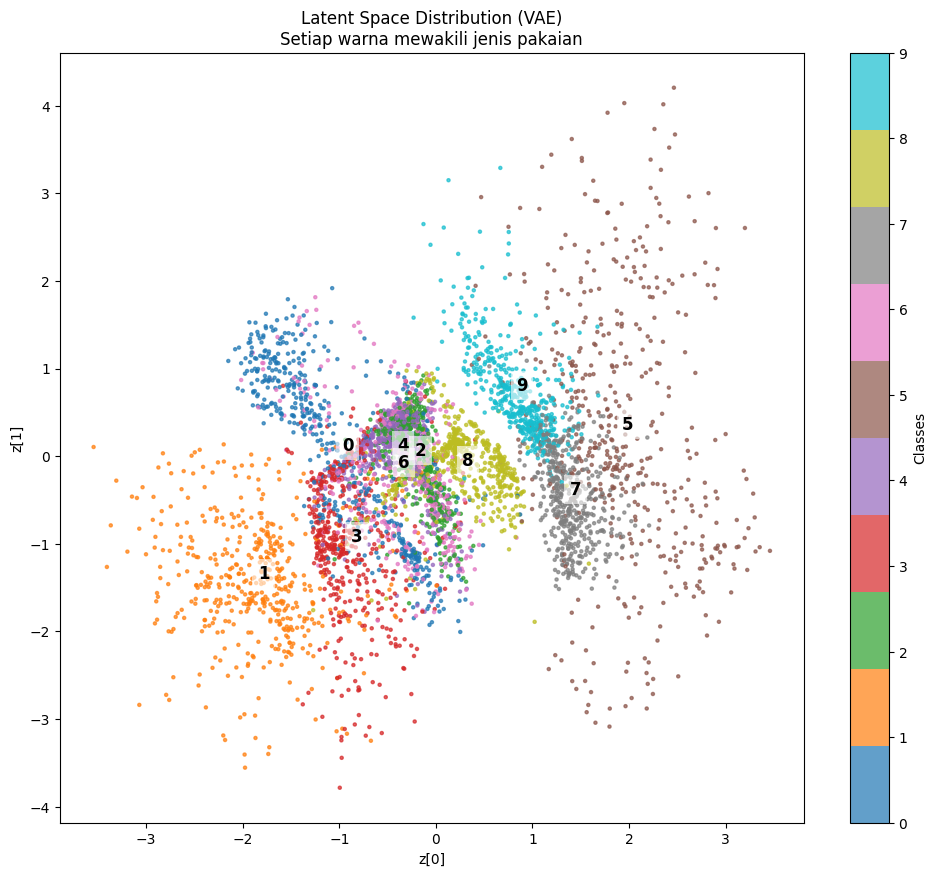

Membuat plot interpolasi latent space...


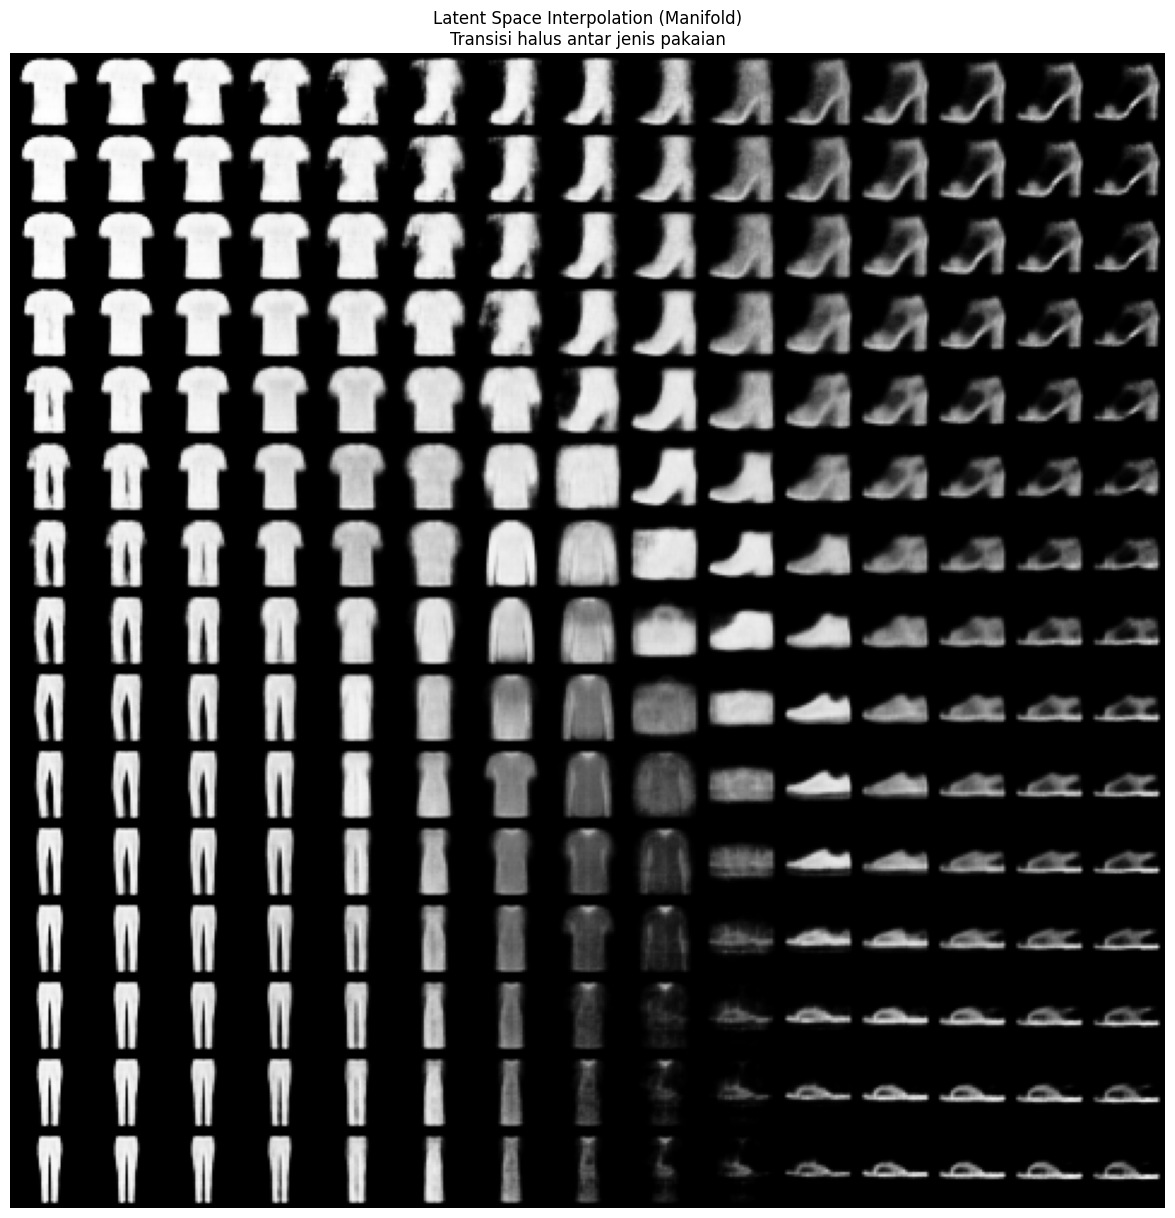

Membandingkan hasil rekonstruksi...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


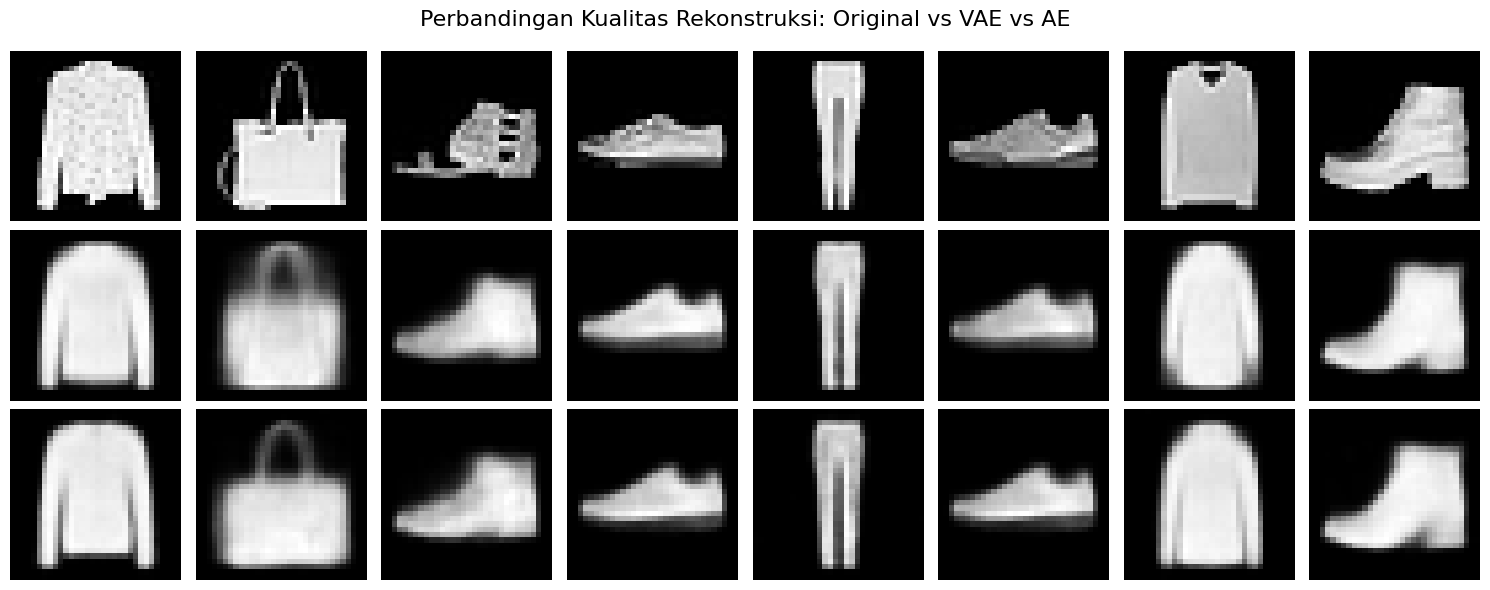


Selesai. Model VAE telah dilatih selama 20 epoch dan dibandingkan dengan AE.


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, losses, optimizers
import matplotlib.pyplot as plt

# ==========================================
# 1. Persiapan Data (Data Preparation)
# ==========================================
print("Memuat dan memproses data Fashion-MNIST...")
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalisasi ke [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Padding menjadi 32x32 agar lebih mudah dengan stride konvolusi standar
x_train = np.pad(x_train, ((0, 0), (2, 2), (2, 2)), constant_values=0.0)
x_test = np.pad(x_test, ((0, 0), (2, 2), (2, 2)), constant_values=0.0)

# Tambah dimensi channel (N, 32, 32, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(f"Shape data training: {x_train.shape}")
print(f"Shape data testing: {x_test.shape}")

# Label Fashion-MNIST untuk visualisasi
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Parameter Global
LATENT_DIM = 2
EPOCHS = 20
BATCH_SIZE = 128

# ==========================================
# 2. Arsitektur Komponen (Encoder & Decoder)
# ==========================================
def build_encoder(latent_dim):
    encoder_input = layers.Input(shape=(32, 32, 1), name="encoder_input")
    x = layers.Conv2D(32, (3, 3), strides=2, padding="same", activation="relu")(encoder_input)
    x = layers.Conv2D(64, (3, 3), strides=2, padding="same", activation="relu")(x)
    x = layers.Conv2D(128, (3, 3), strides=2, padding="same", activation="relu")(x)
    shape_before_flattening = x.shape[1:]
    x = layers.Flatten()(x)
    # Output untuk VAE (mean & log_var)
    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
    return models.Model(encoder_input, [z_mean, z_log_var], name="encoder"), shape_before_flattening

def build_decoder(latent_dim, shape_before_flattening):
    decoder_input = layers.Input(shape=(latent_dim,), name="decoder_input")
    x = layers.Dense(np.prod(shape_before_flattening), activation="relu")(decoder_input)
    x = layers.Reshape(shape_before_flattening)(x)
    x = layers.Conv2DTranspose(128, (3, 3), strides=2, padding="same", activation="relu")(x)
    x = layers.Conv2DTranspose(64, (3, 3), strides=2, padding="same", activation="relu")(x)
    x = layers.Conv2DTranspose(32, (3, 3), strides=2, padding="same", activation="relu")(x)
    decoder_output = layers.Conv2D(1, (3, 3), padding="same", activation="sigmoid")(x)
    return models.Model(decoder_input, decoder_output, name="decoder")

# Bangun komponen dasar
encoder_base, shape_config = build_encoder(LATENT_DIM)
decoder_base = build_decoder(LATENT_DIM, shape_config)

# ==========================================
# 3. Implementasi VAE (Variational Autoencoder)
# ==========================================
class Sampling(layers.Layer):
    """Menggunakan (z_mean, z_log_var) untuk men-sample z, vektor yang merepresentasikan digit."""
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

class VAE(models.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.sampling = Sampling()
        # Trackers untuk monitoring metrics
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(name="recon_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [self.total_loss_tracker, self.reconstruction_loss_tracker, self.kl_loss_tracker]

    def call(self, inputs):
        z_mean, z_log_var = self.encoder(inputs)
        z = self.sampling([z_mean, z_log_var])
        reconstruction = self.decoder(z)
        return reconstruction

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var = self.encoder(data)
            z = self.sampling([z_mean, z_log_var])
            reconstruction = self.decoder(z)

            # Loss function
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "recon_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

# Inisialisasi VAE
vae = VAE(encoder_base, decoder_base)
vae.compile(optimizer=optimizers.Adam())

# ==========================================
# 4. Implementasi Autoencoder Biasa (Pembanding)
# ==========================================
# Kita gunakan arsitektur yang identik, tapi tanpa sampling dan KL divergence
# Encoder AE hanya mengambil z_mean sebagai representasi laten
ae_input = layers.Input(shape=(32, 32, 1))
ae_z_mean, _ = encoder_base(ae_input) # Reuse architecture weights initially, but they will diverge
ae_output = decoder_base(ae_z_mean)
autoencoder = models.Model(ae_input, ae_output, name="Standard_Autoencoder")

# Kita perlu meng-clone model agar bobotnya terpisah dari VAE saat training
# (Cara cepat: membangun ulang struktur agar bobot independen)
ae_encoder_net, _ = build_encoder(LATENT_DIM)
# Modifikasi encoder AE agar outputnya langsung vektor (bukan list mean, var)
ae_enc_input = layers.Input(shape=(32, 32, 1))
mean, _ = ae_encoder_net(ae_enc_input)
ae_encoder_model = models.Model(ae_enc_input, mean)

ae_decoder_net = build_decoder(LATENT_DIM, shape_config)

ae_final_input = layers.Input(shape=(32, 32, 1))
encoded = ae_encoder_model(ae_final_input)
decoded = ae_decoder_net(encoded)
autoencoder_clean = models.Model(ae_final_input, decoded)

autoencoder_clean.compile(optimizer='adam', loss='mse')

# ==========================================
# 5. Training
# ==========================================
print(f"\nMelatih VAE selama {EPOCHS} epoch...")
vae.fit(x_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)

print(f"\nMelatih Autoencoder Biasa selama {EPOCHS} epoch (sebagai pembanding)...")
autoencoder_clean.fit(x_train, x_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)

# ==========================================
# 6. Visualisasi & Analisis
# ==========================================

# --- A. Visualisasi Distribusi Latent Space ---
def plot_latent_space(model, data, labels):
    z_mean, _ = model.encoder.predict(data)
    plt.figure(figsize=(12, 10))
    scatter = plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels, cmap='tab10', alpha=0.7, s=5)
    plt.colorbar(scatter, ticks=range(10), label='Classes')
    plt.title("Latent Space Distribution (VAE)\nSetiap warna mewakili jenis pakaian")
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    # Menambahkan label text pada centroid
    for i in range(10):
        z_cluster = z_mean[labels == i]
        centroid = np.mean(z_cluster, axis=0)
        plt.text(centroid[0], centroid[1], str(i), fontsize=12, weight='bold',
                 bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))
    plt.show()

print("Membuat plot distribusi latent space...")
plot_latent_space(vae, x_test[:5000], y_test[:5000])

# --- B. Latent Space Interpolation (Arithmetic) ---
def plot_interpolation(model, n=15, figsize=(15, 15)):
    # Menampilkan grid gambar dari manifold 2D
    # Kita ambil range berdasarkan distribusi plot sebelumnya (biasanya -3 sampai 3 atau -4 sampai 4)
    digit_size = 32
    scale = 3.0
    figure = np.zeros((digit_size * n, digit_size * n))

    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1] # Reverse y agar sesuai koordinat kartesius

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = model.decoder.predict(z_sample, verbose=0)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size : (i + 1) * digit_size,
                   j * digit_size : (j + 1) * digit_size] = digit

    plt.figure(figsize=figsize)
    plt.title("Latent Space Interpolation (Manifold)\nTransisi halus antar jenis pakaian")
    plt.imshow(figure, cmap="Greys_r")
    plt.axis("off")
    plt.show()

print("Membuat plot interpolasi latent space...")
plot_interpolation(vae)

# --- C. Perbandingan Rekonstruksi: VAE vs Autoencoder ---
def compare_reconstructions(vae_model, ae_model, data, n=8):
    # Ambil sampel acak
    indices = np.random.randint(0, len(data), n)
    samples = data[indices]

    # Prediksi VAE
    z_mean, z_log_var = vae_model.encoder.predict(samples)
    z_sampled = vae_model.sampling([z_mean, z_log_var])
    vae_recon = vae_model.decoder.predict(z_sampled)

    # Prediksi AE Biasa
    ae_recon = ae_model.predict(samples)

    plt.figure(figsize=(15, 6))
    for i in range(n):
        # Original
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(samples[i].squeeze(), cmap="gray")
        if i == 0: ax.set_ylabel("Original", fontsize=12, rotation=90, labelpad=20)
        plt.axis("off")

        # VAE
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(vae_recon[i].squeeze(), cmap="gray")
        if i == 0: ax.set_ylabel("VAE Recon", fontsize=12, rotation=90, labelpad=20)
        plt.axis("off")

        # AE
        ax = plt.subplot(3, n, i + 1 + 2 * n)
        plt.imshow(ae_recon[i].squeeze(), cmap="gray")
        if i == 0: ax.set_ylabel("Standard AE", fontsize=12, rotation=90, labelpad=20)
        plt.axis("off")

    plt.suptitle("Perbandingan Kualitas Rekonstruksi: Original vs VAE vs AE", fontsize=16)
    plt.tight_layout()
    plt.show()

print("Membandingkan hasil rekonstruksi...")
compare_reconstructions(vae, autoencoder_clean, x_test)

print("\nSelesai. Model VAE telah dilatih selama 20 epoch dan dibandingkan dengan AE.")